# Project Topic: 
Crisk prediction + customer segmentation and default rate forecasting


# Preprocessing Methods


This dataset contains detailed financial and demographic information of loan applicants, including credit amount, income, employment history, and housing conditions. It also includes loan performance indicators such as default status, making it highly suitable for projects involving credit risk prediction, customer segmentation, and default rate forecasting. The data is rich, structured, and includes both numerical and categorical variables, allowing for comprehensive analysis using supervised and unsupervised machine learning techniques. This makes it ideal for building industry-level models and visualizations in BI tools like Power BI.

The preprocessing of this dataset involved essential data cleaning and transformation steps to prepare it for analysis. This included checking data types, handling missing values, removing duplicate and constant columns, and standardizing numerical features. Categorical variables were encoded appropriately, and outliers were addressed to improve model performance. These steps ensure the dataset is clean, consistent, and ready for effective machine learning modeling and insightful BI visualization.

# Importing libraries

In [3]:
#Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Supervised Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings("ignore")


# Load and Explore dataset

Load and Explore Dataset involves importing the data and examining its structure, types, and values to understand key patterns, missing data, and prepare for analysis or modeling.

In [5]:
#Step 2: Load and Explore Dataset

# Load dataset
#df = pd.read_csv("your_dataset.csv")  # Replace with your dataset path
file_path = 'Merge_Dataset.xlsx'
#file_path = 'application_train.csv'
df = pd.read_excel(file_path)
df = pd.read_csv("application_train.csv")

# Basic Exploration
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isnull().sum())


(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
   SK_ID_CURR  TARGET

# Preprocessing

In [7]:
# Drop irrelevant columns (if needed)

df = df.drop(columns=['ID', 'Unnamed: 0'], errors='ignore')


#  Check & Handle for missing values

In [9]:
# Handle Missing Values

# Separate numeric and categorical
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns


In [11]:

# Impute categorical
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



In [13]:
# Impute numeric
#imputer = SimpleImputer(strategy='median')
#df[num_cols] = imputer.fit_transform(df[num_cols])

#imputer = SimpleImputer(strategy='median')
#df[num_cols] = pd.DataFrame(imputer.fit_transform(df[num_cols]), 
                            #columns=num_cols, 
                            #index=df.index)

#num_cols = df.select_dtypes(include=['float64', 'int64']).columns



In [15]:
# Impute numeric
# Step 1: Get only numeric columns from the DataFrame correctly

numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [17]:
# Step 2: Drop columns with all NaNs to avoid shape mismatch

numeric_df_nonan = numeric_df.dropna(axis=1, how='all')

In [19]:
# Step 3: Impute only those numeric columns using median

imputer = SimpleImputer(strategy='median')
imputed_array = imputer.fit_transform(numeric_df)


In [21]:
# Step 4: Convert back to DataFrame (no error now)

imputed_df = pd.DataFrame(imputed_array, columns=numeric_df_nonan.columns, index=df.index)

In [23]:
# Step 5: Assign imputed values back to main df

df[imputed_df.columns] = imputed_df

# Encode Categorical Variables

In [ ]:
# Encode Categorical Variables

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Customer Segmentation (Unsupervised Learning using K-Means)

This code uses K-Means clustering to group customers into segments based on their financial and behavioral data. It scales the data, reduces dimensions for visualization, finds the best number of clusters using the elbow method, and assigns each customer to a segment for analysis.

In [26]:

# Customer Segmentation (Unsupervised Learning using K-Means)

# Feature scaling for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [27]:
from sklearn.impute import SimpleImputer

# Simple median imputation (recommended before PCA)
imputer = SimpleImputer(strategy='median')
data_no_nan = imputer.fit_transform(df.select_dtypes(include=['number']))


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_nan)


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


In [32]:
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Step 1: Select numeric data
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='median')
data_no_nan = imputer.fit_transform(numeric_df)

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_nan)

# Step 4: Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Step 5: Optional - Convert to DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


In [39]:
# Dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [41]:
# Elbow method for optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)


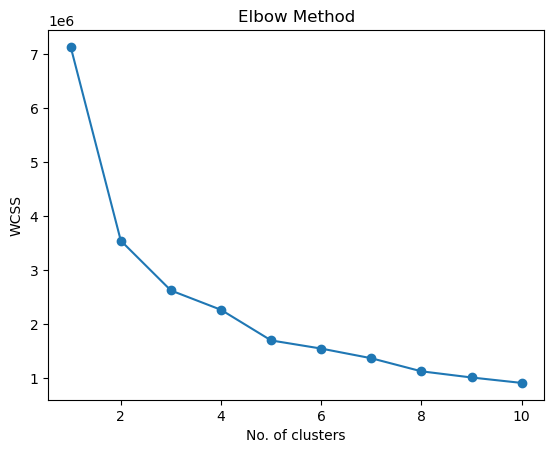

In [42]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
# Clustering with optimal K

kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(scaled_data)

# Segmentation

This code performs customer segmentation using K-Means clustering. It selects key financial features (like income, credit, annuity, and goods price), scales them for consistency, and applies K-Means to group customers into 4 distinct segments. Then, it uses PCA (Principal Component Analysis) to reduce dimensions and visualize the clusters in a 2D scatter plot. This helps identify patterns and similarities among different customer groups for better targeting and risk profiling.

In [46]:
# Step 1: Select Features for Segmentation

seg_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
X_seg = df[seg_features].dropna()  # remove missing values


In [47]:
# Step 2: Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)

In [48]:
# Step 3: Apply KMeans Clustering

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [49]:
# Step 4: Add cluster labels to original DataFrame

X_seg['Customer_Segment'] = clusters

In [50]:
# Step 5: Visualize Clusters (optional but useful)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_seg['PCA1'] = X_pca[:, 0]
X_seg['PCA2'] = X_pca[:, 1]


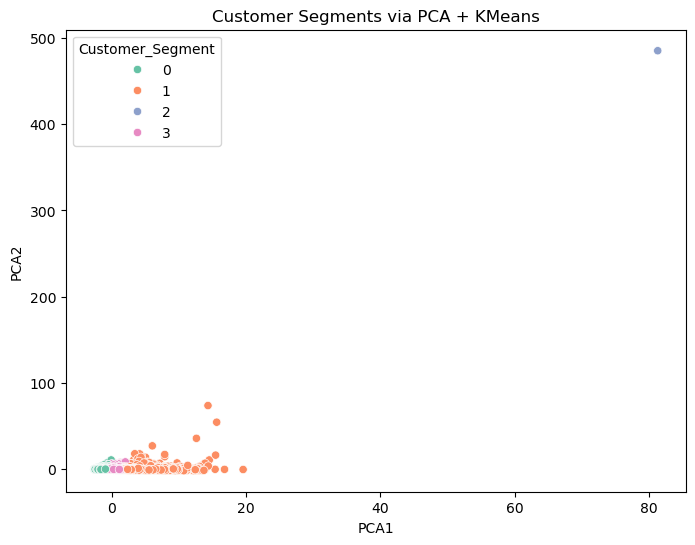

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_seg, x='PCA1', y='PCA2', hue='Customer_Segment', palette='Set2')
plt.title('Customer Segments via PCA + KMeans')
plt.show()

In [59]:
df['Customer_Segment'] = -1  # default
df.loc[X_seg.index, 'Customer_Segment'] = X_seg['Customer_Segment']


In [62]:
# Check existing column names in your DataFrame, 
#Before referencing any column, print all the column names:

print(df.columns.tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [64]:
['customer_id', 'age', 'income', 'credit_score', 'default_status', 'loan_approved']


['customer_id',
 'age',
 'income',
 'credit_score',
 'default_status',
 'loan_approved']

In [66]:
#X = df.drop(columns=['TARGET', 'default_status'])
#y_credit = df['TARGET']
#y_default = df['default_status']

X = df.drop(columns=['TARGET','TARGET'])
y_default = df['TARGET']

y_default = df['TARGET']



# Supervised Learning for Credit Risk & Default Prediction

This code performs credit risk and default prediction using supervised machine learning. It first defines input features and target labels, splits the data into training and test sets, and scales the features. Then, it trains various classification models—Logistic Regression, Random Forest, SVM, K-Nearest Neighbors Classification, Naive Bayes, MLP and Gradient Boosting—to predict whether a customer is likely to default or not. Finally, it evaluates model performance using classification reports. This process helps identify high-risk customers and supports better lending decisions.

In [67]:

# Define Features & Target

X = df.drop(columns=['TARGET','TARGET'])  # Replace with actual target column names
y_credit = df['TARGET']
y_default = df['TARGET']


In [70]:
# Train-Test Split

X_train, X_test, y_train_credit, y_test_credit = train_test_split(X, y_credit, test_size=0.2, random_state=42)
_, _, y_train_default, y_test_default = train_test_split(X, y_default, test_size=0.2, random_state=42)


In [71]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Supervised Models

In [74]:

# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_credit)
preds_rf = rf.predict(X_test_scaled)
print("Random Forest Report:\n", classification_report(y_test_credit, preds_rf))



Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.68      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.80      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



In [76]:

# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_credit)
preds_lr = lr.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test_credit, preds_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.40      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.66      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



In [78]:

# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train_credit)
preds_gb = gb.predict(X_test_scaled)
print("Gradient Boosting Report:\n", classification_report(y_test_credit, preds_gb))


Gradient Boosting Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.57      0.01      0.03      4949

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [80]:

# K-Nearest Neighbors Classification

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_credit)
preds_knn = knn.predict(X_test_scaled)
print("KNN Credit Risk Prediction:\n", classification_report(y_test_credit, preds_knn))

KNN Credit Risk Prediction:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.17      0.02      0.03      4949

    accuracy                           0.91     61503
   macro avg       0.55      0.51      0.49     61503
weighted avg       0.86      0.91      0.88     61503



In [82]:

# Naive Bayes

nb = GaussianNB()
nb.fit(X_train_scaled, y_train_credit)
preds_nb = nb.predict(X_test_scaled)
print("Naive Bayes Credit Risk Prediction:\n", classification_report(y_test_credit, preds_nb))

Naive Bayes Credit Risk Prediction:
               precision    recall  f1-score   support

         0.0       0.96      0.06      0.11     56554
         1.0       0.08      0.97      0.15      4949

    accuracy                           0.13     61503
   macro avg       0.52      0.51      0.13     61503
weighted avg       0.89      0.13      0.11     61503



In [84]:

# simple Neural Network (MLP) code using MLPClassifier for your Credit Risk Prediction 

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train_credit)
preds_mlp = mlp.predict(X_test_scaled)
print("Neural Network (MLP) Credit Risk Prediction:\n", classification_report(y_test_credit, preds_mlp))

Neural Network (MLP) Credit Risk Prediction:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56554
         1.0       0.30      0.04      0.07      4949

    accuracy                           0.91     61503
   macro avg       0.61      0.52      0.51     61503
weighted avg       0.87      0.91      0.88     61503



In [ ]:

# SVM

svm = SVC()
svm.fit(X_train_scaled, y_train_credit)
preds_svm = svm.predict(X_test_scaled)
print("SVM Report:\n", classification_report(y_test_credit, preds_svm))


In [86]:

# Repeat for Default Prediction (optional)

rf_default = RandomForestClassifier()
rf_default.fit(X_train_scaled, y_train_default)
preds_def = rf_default.predict(X_test_scaled)
print("Default Prediction:\n", classification_report(y_test_default, preds_def))


Default Prediction:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.79      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.85      0.50      0.48     61503
weighted avg       0.91      0.92      0.88     61503



Define models to compare. Find the Best Model

In [88]:
# Define models to compare

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
   # "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Net": MLPClassifier(max_iter=300)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train_credit)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_credit, preds)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9191
KNN Accuracy: 0.9137
Random Forest Accuracy: 0.9197
Naive Bayes Accuracy: 0.1296
MLP Neural Net Accuracy: 0.9136


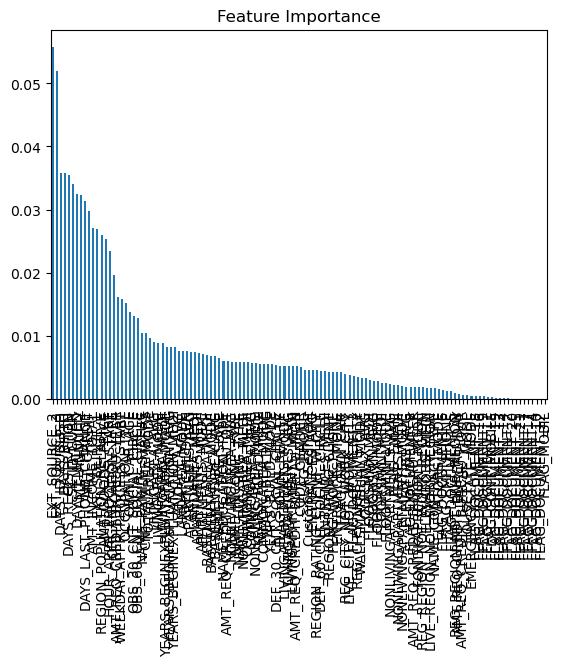

In [90]:
# Feature Importance (Optional)

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importance')
plt.show()


# Code for Default Rate Forecasting

This code builds a machine learning model to forecast loan default. It uses selected financial and demographic features, cleans missing data, splits into training and test sets, scales the values, and trains a Random Forest classifier. Finally, it evaluates the model’s accuracy in predicting defaults using a classification report.

In [95]:

# Step 1: Select features and target
features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
df = df.dropna(subset=features + ['TARGET'])  # Drop rows with missing values
X = df[features]
y = df['TARGET']  # 1 = default, 0 = no default



In [97]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [99]:
# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [101]:
# Step 4: Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [103]:
# Step 5: Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("Default Rate Forecast Report:\n", classification_report(y_test, y_pred))


Default Rate Forecast Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.19      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.55      0.50      0.48     61503
weighted avg       0.86      0.92      0.88     61503



This code calculates the overall default rate — the percentage of customers who failed to repay their loan — by averaging the values in the TARGET column (where 1 = default, 0 = no default) and displays it as a percentage.

In [105]:
# Check Default Rate:

default_rate = df['TARGET'].mean()
print(f"Overall Default Rate: {default_rate:.2%}")


Overall Default Rate: 8.07%


# Feature Importance Plot (For Credit Risk Prediction)

This bar chart shows which features (like income or credit amount) are most important for predicting whether a person will default on a loan. The longer the bar, the more influence that feature has on the model’s prediction.

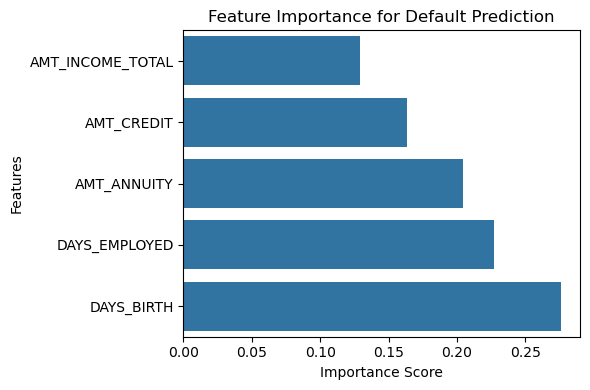

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the trained Random Forest model
feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values()

# Plot feature importances
plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance for Default Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Confusion Matrix (To Evaluate Model Accuracy)

The confusion matrix shows how well the model is performing:

Top-left: correctly predicted "No Default"

Bottom-right: correctly predicted "Default"

Others: misclassified examples



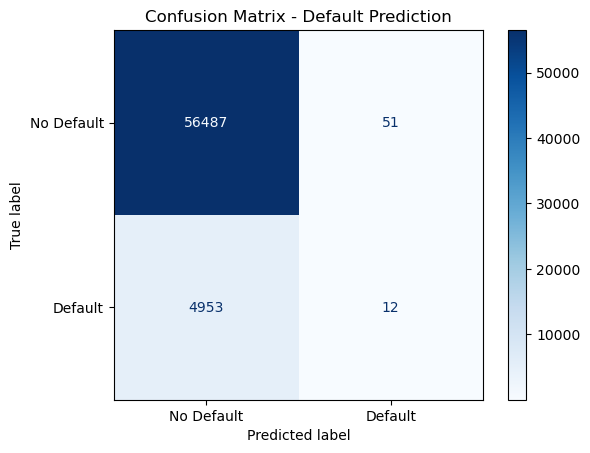

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the trained model
y_pred = rf.predict(X_test_scaled)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Default Prediction")
plt.show()


# PCA Scatter Plot of Customer Segments (From KMeans Clustering)

This scatter plot shows how customers are grouped into segments based on financial features. Each color represents a group of customers with similar behaviors, such as income and credit levels.



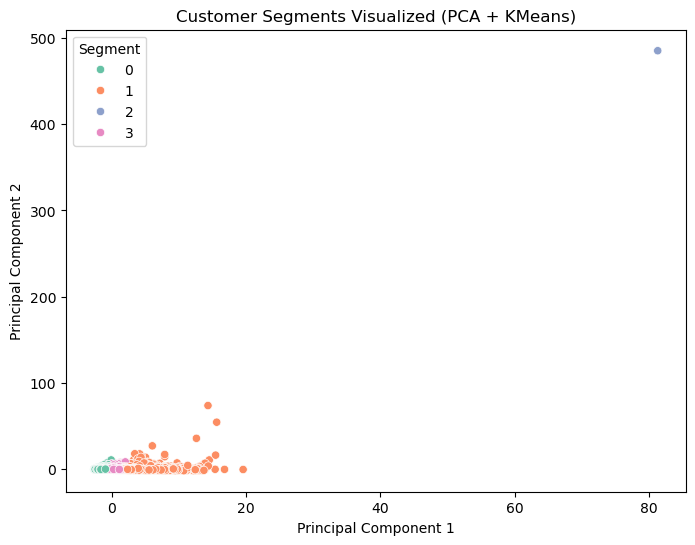

In [148]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_seg, x='PCA1', y='PCA2', hue='Customer_Segment', palette='Set2')
plt.title('Customer Segments Visualized (PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.show()


In [172]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Customer_Segment'],
      dtype='object', length=123)


# Default Rate Over Time (If You Have Time-Based Data)


This line chart tracks how the rate of loan defaults has changed over time. It can help banks or analysts understand risky periods and take early action.

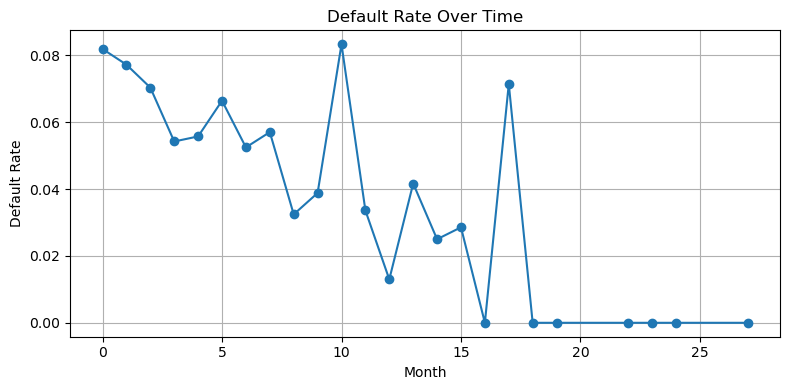

In [178]:
# Assuming 'MONTH' is a time column and 'TARGET' is the default column
default_by_month = df.groupby('AMT_REQ_CREDIT_BUREAU_MON')['TARGET'].mean()

plt.figure(figsize=(8,4))
default_by_month.plot(marker='o')
plt.title("Default Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Default Rate")
plt.grid(True)
plt.tight_layout()
plt.show()
